# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
data = pd.read_csv("/content/drive/MyDrive/Tobigs/Week2/Week2_Regression/과제/assignment3_creditcard.csv")

In [39]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058,0
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848,0
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035,0
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999,0


In [40]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [41]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

클래스가 1인 데이터가 사기 거래이다. \
전체 거래 중 사기 거래의 비율이 굉장히 적은 것을 알 수 있다. 따라서 이 데이터는 굉장히 불균형적인 데이터이다.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [43]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


V1 ~ V28 데이터들의 통계량(평균, 최댓값, 최솟값, 분산)의 차이가 심한 것을 알 수 있다. \

우선 분할 학습을 위한 데이터 분할을 해준다.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:-1], data.iloc[:, -1], test_size = 0.25, random_state =42)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21508, 28), (7170, 28), (21508,), (7170,))

In [115]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

각 변수 feature들의 평균, 분산이 다르므로 스케일링을 진행해 준다.

In [116]:
model =  LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

scikit-learn의 LogisticRegression 패키지를 이용하여 X_train, y_train에 대해 학습해 주었다. \

최적의 parameter를 구했으므로 이제 Cutoff(Threshold)의 조절을 통해 모델의 성능 지표를 조절해 볼 것이다.

In [117]:
from sklearn.metrics import *

우선 Cutoff의 조절을 진행하기에 앞서, 생각해봐야 할 것이 있다. \

우리의 목표는 주어진 dataset을 이용해 신용카드 거래의 사기 여부를 예측하여 분류하는 것이다. \

사기 거래의 경우 True Negative인 데이터를 False Negative로 판단하는 것 보다 True Positive인 데이터를 False Positive로 판단하는 것이 더 치명적이다. 따라서 TP / (TP + FP)의 수치를 낮추는 것, 즉 재현율(Recall)에 초점을 맞추어 모델 성능을 판단하는 것이 더 적합하다. \

따라서 Cutoff에 따른 성능 지표를 판단할 때 정밀도(Precision)을 크게 해치지 않는 선에서 재현율(Recall)이 높은 Cutoff를 설정하는 것이 좋을 것이다.

In [121]:
Cut_off = np.linspace(0.850000000, 0.9900000000, 30) #cut off 값 만들기

for cutoff in Cut_off:

  y_pred = np.where(model.predict_proba(X_test)[:, 0]>=cutoff, 0, 1)

  #cutoff 보다 크면 1 (사기), 아니면 0 (정상)
  acc = accuracy_score(y_true=y_test, y_pred = y_pred) #정확도
  recall = recall_score(y_true=y_test, y_pred = y_pred) #재현율
  precision = precision_score(y_true = y_test, y_pred = y_pred) #정밀도
  f1score = f1_score(y_true = y_test, y_pred = y_pred) #f1_score

  print(confusion_matrix(y_test, y_pred))

  print(f"정확도 : {acc : 0.10f}",f"재현율 : {recall : 0.10f}",f"정밀도 : {precision : 0.10f}",f"f1_score : {f1score : 0.10f}", f"cut off : {cutoff : 0.10f}")

[[7104    3]
 [   9   54]]
정확도 :  0.9983263598 재현율 :  0.8571428571 정밀도 :  0.9473684211 f1_score :  0.9000000000 cut off :  0.8500000000
[[7104    3]
 [   9   54]]
정확도 :  0.9983263598 재현율 :  0.8571428571 정밀도 :  0.9473684211 f1_score :  0.9000000000 cut off :  0.8548275862
[[7104    3]
 [   9   54]]
정확도 :  0.9983263598 재현율 :  0.8571428571 정밀도 :  0.9473684211 f1_score :  0.9000000000 cut off :  0.8596551724
[[7104    3]
 [   9   54]]
정확도 :  0.9983263598 재현율 :  0.8571428571 정밀도 :  0.9473684211 f1_score :  0.9000000000 cut off :  0.8644827586
[[7102    5]
 [   9   54]]
정확도 :  0.9980474198 재현율 :  0.8571428571 정밀도 :  0.9152542373 f1_score :  0.8852459016 cut off :  0.8693103448
[[7102    5]
 [   9   54]]
정확도 :  0.9980474198 재현율 :  0.8571428571 정밀도 :  0.9152542373 f1_score :  0.8852459016 cut off :  0.8741379310
[[7101    6]
 [   8   55]]
정확도 :  0.9980474198 재현율 :  0.8730158730 정밀도 :  0.9016393443 f1_score :  0.8870967742 cut off :  0.8789655172
[[7101    6]
 [   8   55]]
정확도 :  0.9980474198 재

Cutoff를 [0.85, 0.99]의 구간에서 30번 나누어 y_pred를 구하였다. \

각 Cutoff에 대한 모델 성능 지표를 보았을 때, Cutoff가 올라갈수록 재현율은 오르지만 정밀도가 현저하게 떨어지는 것을 알 수 있다. \

따라서 f1_score를 고려하여 재현율과 정밀도의 편차가 심하지 않은 케이스의 Cutoff를 최종적으로 선정하는 것이 좋겠다. \


CutOff가 0.9272413793일 때 모델의 정확도, 재현율, 정밀도, f1_score가 고르게 산출된 것을 볼 수 있다. 따라서 최종 모델의 Cutoff는 0.9272413783으로 선정한다.

In [122]:
Cutoff = 0.9272413793

y_pred = np.where(model.predict_proba(X_test)[:, 0]>=cutoff, 0, 1)

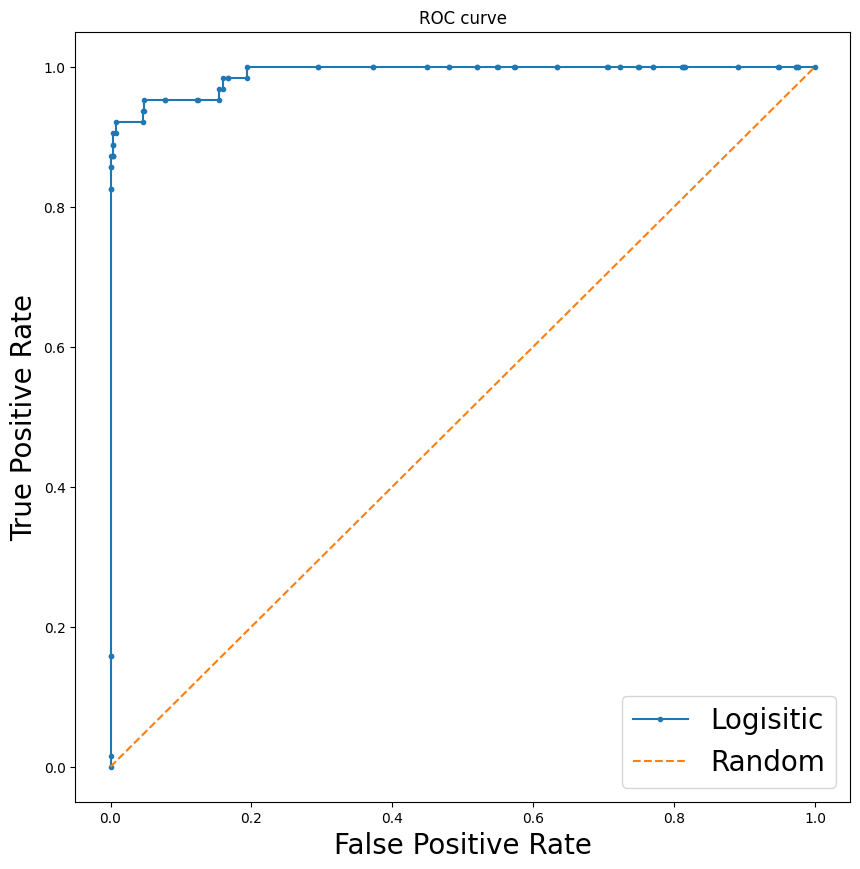

In [123]:
#X_test에 대해 y=1(사기)일 확률
probs=model.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 사기 여부를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

최종 로지스틱 모델의 ROC 곡선을 살펴본다.